<a href="https://colab.research.google.com/github/samuelhuss/tech-challenge/blob/main/Projeto_Finalizado_Etapa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech Challenge - Medical Costs Predict

**Integrantes**: Bruno da Gama, Maycon Garrido e Samuel Huss

## **1. Introdução**

O aumento dos custos com saúde tem se tornado uma preocupação crescente em todo o mundo, afetando tanto indivíduos quanto sistemas de saúde. A previsão precisa dos custos médicos individuais é essencial para que seguradoras de saúde possam gerenciar seus riscos e planejar adequadamente seus serviços. Neste projeto, propomos o desenvolvimento de um modelo preditivo de regressão capaz de prever os custos médicos de pacientes com base em características individuais, como idade, gênero, índice de massa corporal (IMC), número de filhos, hábitos de tabagismo e região de residência.

Utilizando um conjunto de dados abrangente que inclui variáveis demográficas e comportamentais, realizaremos uma análise exploratória para entender as características e distribuições dos dados. Em seguida, aplicaremos técnicas de pré-processamento para garantir que as variáveis categóricas sejam convertidas de forma adequada e que não haja valores ausentes que possam comprometer a integridade do modelo.

Após a limpeza e transformação dos dados, construiremos um modelo preditivo utilizando técnicas de regressão, como Regressão Linear e Árvores de Decisão, dividindo o conjunto de dados em conjuntos de treinamento e teste. O desempenho do modelo será avaliado utilizando métricas estatísticas robustas, como RMSE, R² e MAPE.

Ao final deste projeto, esperamos obter um modelo confiável que possa prever os custos médicos individuais com base nas características fornecidas, contribuindo assim para um melhor entendimento e gerenciamento dos custos na área da saúde. Os resultados obtidos serão apresentados em gráficos de previsões versus valores reais, juntamente com uma análise detalhada e insights relevantes sobre as variáveis que mais influenciam os custos médicos.

## **2. Exploração dos Dados**
Nesta etapa, importamos as bibliotecas, os dados são carregados e uma análise exploratória dos mesmos é realizada para entender melhor suas características.

**Descrição dos dados:**
* `age`: *Idade do paciente*
* `sex`: *Sexo*
* `bmi`: *Índice de Massa Corporal*
* `children`: *Número de filhos*
* `smoker`: *Se o paciente é fumante*
* `region`: *Região de residência*
* `charges`: *Custos médicos*




### Manipulação de Dados


In [1]:
import pandas as pd
import numpy as np

### Visualização de Dados


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Pré-processamento e Transformação de Dados


In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

### Pipelines

In [4]:
from sklearn.pipeline import Pipeline

### Modelos de Regressão

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb

### Treinamento e Validação de Modelos

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV

### Métricas de Avaliação de Modelos


In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

### Configuração de Estilo dos Gráficos


In [8]:
%matplotlib inline

In [9]:
sns.set_style('ticks')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [10]:
df = pd.read_csv("/content/Health_insurance.csv")

In [11]:
df_light = df.rename(columns={
    "age":"age",
    "sex":"sex",
    "bmi":"bmi",
    "children":"children",
    "smoker":"smoker",
    "region":"region",
    "charges":"medical_cost"
    })

## **3. Análise Exploratória**

Nesta etapa, aprofundou-se a análise dos dados por meio da criação de gráficos de correlação e scatter plots, destacando as relações entre as variáveis e os custos médicos. Foi aplicada a técnica de LabelEncoder para transformar as variáveis categóricas em valores numéricos.

Além disso, foi gerado um gráfico de correlação entre as variáveis, utilizando um heatmap, para identificar as variáveis que têm maior correlação com os custos médicos.


In [12]:
df_light.shape

(1338, 7)

In [13]:
df_light.head()

,age,sex,bmi,children,smoker,region,medical_cost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df_light.describe()

,age,bmi,children,medical_cost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df_light.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   medical_cost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df_light.isnull().sum() #Validando se existe dados null

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
medical_cost,0


In [17]:
df_light.duplicated().sum() #Validando se existe dados duplicados

1

In [18]:
fig = px.histogram(df_light, x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribuição de Idade')
fig.update_layout(bargap=0.1)
fig.show()

## Criando um histograma de distribuição de idades do Dataset


In [19]:
fig = px.histogram(df_light,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribuição de IMC (Índice de massa corporal)')
fig.update_layout(bargap=0.1)
fig.show()

## Criando um histograma para a verificação dos Custos Médicos categorizados por Fumantes e Não Fumantes


In [20]:
fig = px.histogram(df_light,
                   x='medical_cost',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'grey'],
                   title='Custo Médico Anual')
fig.update_layout(bargap=0.1)
fig.show()

## Criando um histograma para a verificação dos Custos Médicos categorizados por Sexo


In [21]:
fig = px.histogram(df_light,
                   x = 'medical_cost',
                   color = 'sex',
                   color_discrete_sequence = ["blue","red"],
                   title = 'Diferença de Custo por Sexo'

)
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
df_light.get('smoker').value_counts()

,count
smoker,
no,1064
yes,274


## Criando um histograma para a verificação dos Custos Médicos categorizados por Região dos EUA

In [23]:
fig = px.histogram(df_light,
                  x = "medical_cost",
                  marginal = 'box',
                   color="region",
                  title = "Custos por diferentes regiões do E.U.A")
fig.update_layout(bargap=0.1)
fig.show()

## Verificando a distribuição dos Custos Médicos considerando a categoria Filhos


In [24]:
fig = px.histogram(df_light,
                  x = 'medical_cost',
                   marginal ="box",
                  color = 'children',
                  title = 'Custos realizados por filho')
fig.update_layout(bargap=0.1)
fig.show()

## Correlacionando a idade com os Custos
Nota-se um ligeiro aumento dos custos médicos a medida que a idade aumenta.


In [25]:
fig = px.scatter(df_light,
                 x='age',
                 y='medical_cost',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Idade vs. Custos')
fig.update_traces(marker_size=5)
fig.show()

In [26]:
fig = px.scatter(df_light, x='smoker', y='medical_cost', title='Smoker vs Medical Cost')
fig.show()

In [27]:
fig = px.scatter(df_light, x='age', y='medical_cost', color='smoker', trendline='ols',
                 labels={'age': 'Idade', 'medical_cost': 'Custo Médico'},
                 title="Relação entre Idade e Custo Médico por Status de Fumante")

fig.update_layout(
    title_font=dict(size=22, family='Arial', color='darkblue'),
    xaxis_title_font=dict(size=18, family='Arial', color='black'),
    yaxis_title_font=dict(size=18, family='Arial', color='black'),
    legend_title_text='Fumante',
    legend=dict(
        title_font=dict(size=16),
        font=dict(size=14)
    ),
    template='plotly_white'
)

fig.show()

In [28]:
fig = px.scatter(df_light, x='bmi', y='medical_cost', color='smoker', trendline='ols',
                 labels={'bmi': 'IMC', 'medical_cost': 'Custo Médico'},
                 title="Relação entre IMC e Custo Médico por Status de Fumante")

fig.update_layout(
    title_font=dict(size=22, family='Arial', color='darkblue'),
    xaxis_title_font=dict(size=18, family='Arial', color='black'),
    yaxis_title_font=dict(size=18, family='Arial', color='black'),
    legend_title_text='Fumante',
    legend=dict(
        title_font=dict(size=16),
        font=dict(size=14)
    ),
    template='plotly_white'
)

fig.show()

In [29]:
fig = px.scatter(df_light, x='children', y='medical_cost', color='smoker', trendline='ols',
                 labels={'children': 'Filhos', 'medical_cost': 'Custo Médico'},
                 title="Relação entre Filhos e Custo Médico por Status de Fumante")

fig.update_layout(
    title_font=dict(size=22, family='Arial', color='darkblue'),
    xaxis_title_font=dict(size=18, family='Arial', color='black'),
    yaxis_title_font=dict(size=18, family='Arial', color='black'),
    legend_title_text='Fumante',
    legend=dict(
        title_font=dict(size=16),
        font=dict(size=14)
    ),
    template='plotly_white'
)

fig.show()

### **3.1. Gráfico de Correlação**

Criando uma cópia do DataFrame original


In [30]:
df_corr = df_light.copy()

Aplicando o LabelEncoder nas colunas categóricas


In [31]:
le = LabelEncoder()

df_corr['sex'] = le.fit_transform(df_corr['sex'])
df_corr['smoker'] = le.fit_transform(df_corr['smoker'])
df_corr['region'] = le.fit_transform(df_corr['region'])

Gerando a matriz de correlação


In [32]:
correlacao = df_corr.corr()

Exibindo o heatmap de correlação

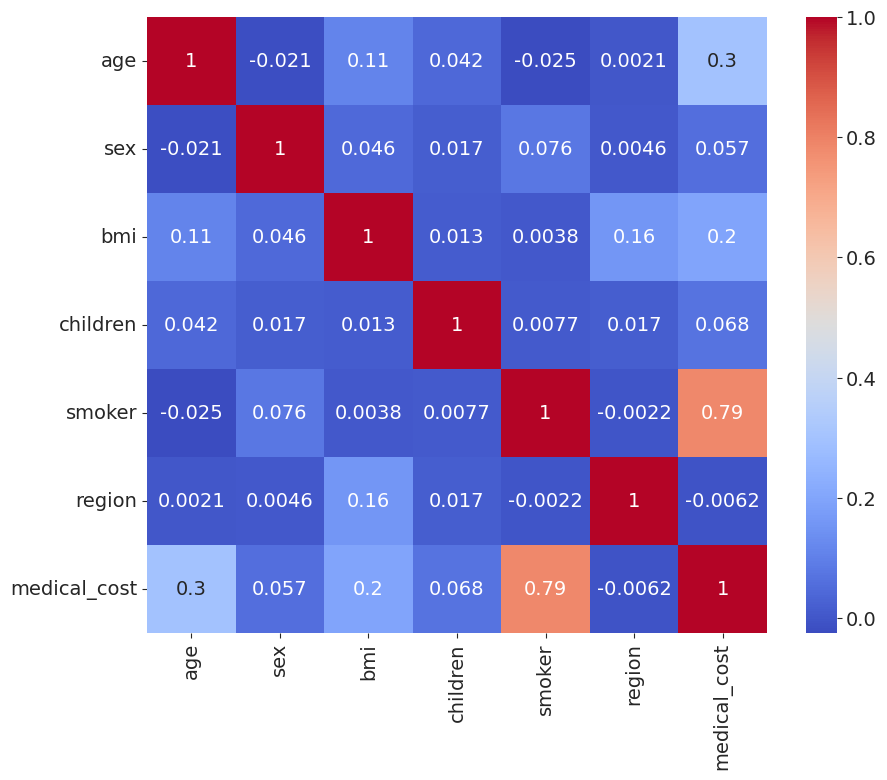

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="coolwarm")
plt.show()

Verificando se existem dados com gradezas diferentes.


{'whiskers': [<matplotlib.lines.Line2D at 0x784a819d3850>,
 'caps': [<matplotlib.lines.Line2D at 0x784a819d11b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x784a819d39a0>],
 'medians': [<matplotlib.lines.Line2D at 0x784a819d18d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x784a78238100>],
 'means': []}

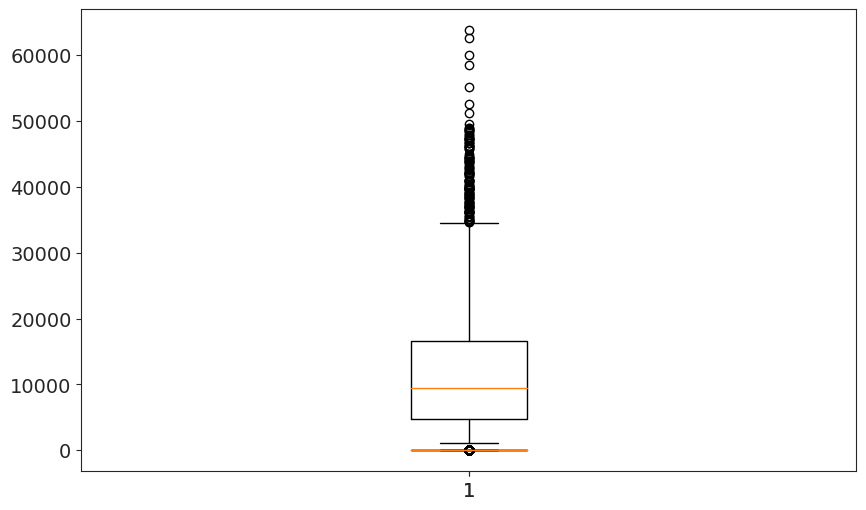

In [34]:
plt.boxplot(df_corr['smoker'])
plt.boxplot(df_corr['medical_cost'])

## **4. Feature scaling**

In [35]:
X = df_light.drop(columns='medical_cost')
y = df_light['medical_cost']

categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

## **5. Dividindo Dados**
Nesta etapa, foi realizada a divisão dos dados entre conjunto de treino (80%) e teste (20%), com o objetivo de treinar os modelos preditivos e avaliá-los posteriormente.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **6. Treinamento do Modelo**
Nesta seção, treinamos o modelo de regressão para prever os custos médicos com base nas variáveis fornecidas.

* Regressão Linear
* Random Forest
* Gradient Boosting
* Decision Tree
* K-Neighbors
* Ridge Regression
* Lasso Regression
* ElasticNet
* Support Vector Regressor
* XGBoost


### Linear Regression

In [37]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])

In [38]:
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

### Random Forest

In [39]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(random_state=42))])

In [40]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

### Gradient Boosting


In [41]:
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingRegressor(random_state=42))])

In [42]:
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

### Decision Tree Regressor


In [43]:
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', DecisionTreeRegressor(random_state=42))])

In [44]:
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)

### K-Neighbors Regressor


In [45]:
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', KNeighborsRegressor())])

In [46]:
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

### Ridge Regression

In [47]:
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', Ridge())])

In [48]:
ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

### Lasso Regression

In [49]:
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', Lasso())])

In [50]:
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

### ElasticNet Regression

In [51]:
elasticnet_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', ElasticNet())])

In [52]:
elasticnet_pipeline.fit(X_train, y_train)
y_pred_elasticnet = elasticnet_pipeline.predict(X_test)

### Support Vector Regressor



In [53]:
svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', SVR())])

In [54]:
svr_pipeline.fit(X_train, y_train)
y_pred_svr = svr_pipeline.predict(X_test)

### XGBoost Regressor


In [55]:
xgboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', xgb.XGBRegressor(random_state=42))])

In [56]:
xgboost_pipeline.fit(X_train, y_train)
y_pred_xgboost = xgboost_pipeline.predict(X_test)

## **7. Avaliação do Modelo**
Após o treinamento, avaliamos o desempenho do modelo utilizando métricas como:

* **Mean Absolute Error (MAE)**
* **Mean Squared Error (MSE)**
* **R-squared**
* **Mape**
* **Explained Variance**

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score

def evaluate_model(model_name, X_test, y_test, y_pred):
    # Calculando as métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)

    # Exibindo os resultados
    print(f"\n{'='*40}")
    print(f"{model_name.center(40)}")
    print(f"{'='*40}")
    print(f"| {'Metric':<20} | {'Value':>16} |")
    print(f"{'-'*40}")
    print(f"| {'RMSE':<20}    | {rmse:>16} |")
    print(f"| {'R²':<20}      | {r2:>16} |")
    print(f"| {'MAE':<20}     | {mae:>16} |")
    print(f"| {'MSE':<20}     | {mse:>16} |")
    print(f"| {'MAPE':<20}    | {mape * 100:>16} |")
    print(f"| {'Explained Variance':<20} | {explained_variance:>16} |")
    print(f"{'='*40}\n")

    # Gráfico de comparação entre valores reais e previstos
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=y_test, y=y_pred,
                             mode='markers',
                             name='Predicted vs Actual',
                             marker=dict(color='blue', size=6, opacity=0.7)))

    fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()],
                             y=[y_test.min(), y_test.max()],
                             mode='lines',
                             name='Ideal',
                             line=dict(color='red', dash='dash')))

    fig.update_layout(title=f'Real vs Predicted - {model_name}',
                      xaxis_title='Actual Medical Cost',
                      yaxis_title='Predicted Medical Cost',
                      template='plotly_white',
                      plot_bgcolor='rgba(0, 0, 0, 0)')

    fig.show()

In [58]:
evaluate_model("Linear Regression", X_test, y_test, y_pred_lr)


           Linear Regression            
| Metric               |            Value |
----------------------------------------
| RMSE                    | 5796.284659276274 |
| R²                        | 0.7835929767120722 |
| MAE                      | 4181.194473753652 |
| MSE                      | 33596915.851361476 |
| MAPE                    | 46.88825597914696 |
| Explained Variance   | 0.7839025861417648 |



In [59]:
evaluate_model("Decision Tree", X_test, y_test, y_pred_dt)


             Decision Tree              
| Metric               |            Value |
----------------------------------------
| RMSE                    | 6153.759346124371 |
| R²                        | 0.7560768856135891 |
| MAE                      | 2934.335915097015 |
| MSE                      | 37868754.09001305 |
| MAPE                    | 38.310406811028855 |
| Explained Variance   | 0.7591644208332414 |



In [60]:
evaluate_model("K-Neighbors", X_test, y_test, y_pred_knn)


              K-Neighbors               
| Metric               |            Value |
----------------------------------------
| RMSE                    | 5998.687931925466 |
| R²                        | 0.7682154529775659 |
| MAE                      |    3631.59117925 |
| MSE                      | 35984256.904628225 |
| MAPE                    | 40.29677995026158 |
| Explained Variance   | 0.7685465936304338 |



In [61]:
evaluate_model("Ridge Regression", X_test, y_test, y_pred_ridge)


            Ridge Regression            
| Metric               |            Value |
----------------------------------------
| RMSE                    | 5798.298795415479 |
| R²                        | 0.7834425531348184 |
| MAE                      | 4186.913071783836 |
| MSE                      | 33620268.920916595 |
| MAPE                    | 47.01215685369263 |
| Explained Variance   | 0.7837532046854536 |



In [62]:
evaluate_model("Lasso Regression", X_test, y_test, y_pred_lasso)


            Lasso Regression            
| Metric               |            Value |
----------------------------------------
| RMSE                    | 5797.054261443071 |
| R²                        | 0.7835355059767686 |
| MAE                      | 4182.08107647737 |
| MSE                      | 33605838.11011527 |
| MAPE                    | 46.91857890432922 |
| Explained Variance   | 0.783845016770379 |



In [63]:
evaluate_model("ElasticNet", X_test, y_test, y_pred_elasticnet)


               ElasticNet               
| Metric               |            Value |
----------------------------------------
| RMSE                    | 8636.572305383988 |
| R²                        | 0.5195427333325542 |
| MAE                      | 6513.223507304511 |
| MSE                      | 74590381.18612571 |
| MAPE                    | 101.78104936356563 |
| Explained Variance   | 0.520144105939575 |



In [64]:
evaluate_model("Support Vector Regressor", X_test, y_test, y_pred_svr)


        Support Vector Regressor        
| Metric               |            Value |
----------------------------------------
| RMSE                    | 12892.023995416239 |
| R²                        | -0.0705677341215194 |
| MAE                      | 8605.845654288496 |
| MSE                      | 166204282.6983881 |
| MAPE                    | 112.79273582520142 |
| Explained Variance   | 0.004519318110388304 |



In [65]:
evaluate_model("XGBoost", X_test, y_test, y_pred_xgboost)


                XGBoost                 
| Metric               |            Value |
----------------------------------------
| RMSE                    | 4738.609614038749 |
| R²                        | 0.8553648660539922 |
| MAE                      | 2604.33380438727 |
| MSE                      | 22454421.07426046 |
| MAPE                    | 32.71749076787863 |
| Explained Variance   | 0.8553651614630164 |



In [66]:
evaluate_model("Random Forest", X_test, y_test, y_pred_rf)


             Random Forest              
| Metric               |            Value |
----------------------------------------
| RMSE                    | 4582.9725734250405 |
| R²                        | 0.8647097634425496 |
| MAE                      | 2541.614593844528 |
| MSE                      | 21003637.60876614 |
| MAPE                    | 30.750766298738608 |
| Explained Variance   | 0.8659610978447688 |



In [67]:
evaluate_model("Gradient Boosting", X_test, y_test, y_pred_gb)


           Gradient Boosting            
| Metric               |            Value |
----------------------------------------
| RMSE                    | 4328.147789045083 |
| R²                        | 0.8793364486536337 |
| MAE                      | 2404.90176028892 |
| MSE                      | 18732863.283815846 |
| MAPE                    | 28.512832084248878 |
| Explained Variance   | 0.8796188671288437 |



### **Ajuste de Hiperparâmetros (Random Forest**)
Vamos ajustar hiperparâmetros para melhorar o modelo de Random Forest

In [68]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

In [69]:
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Melhores hiperparâmetros para Random Forest:", grid_search.best_params_)

In [ ]:
best_rf_model = grid_search.best_estimator_

In [ ]:
y_pred_best_rf = best_rf_model.predict(X_test)

In [ ]:
evaluate_model("Random Forest (Tuned)", X_test, y_test, y_pred_best_rf)

## **8. Conclusão**

Neste estudo, abordamos com sucesso o problema da predição de custos médicos individuais utilizando uma abordagem de aprendizado de máquina baseada em modelos de regressão. A análise exploratória de dados revelou padrões importantes, como o impacto do tabagismo, idade, e índice de massa corporal (IMC) nos custos médicos. Esses insights forneceram uma base sólida para a construção e comparação de diversos modelos, incluindo Regressão Linear, Decision Tree, K-Neighbors, Ridge Regression, Lasso Regression, ElasticNet, Support Vector Regressor, XGBoost, Random Forest e Gradient Boosting. A avaliação dos modelos foi realizada com base em métricas como RMSE, R², MAE, MSE, MAPE e Variância Explicada.

Entre os modelos analisados, os melhores resultados foram obtidos com Gradient Boosting, que apresentou o menor RMSE (4328.15) e o maior valor de R² (0.8793), indicando que ele teve o melhor desempenho preditivo geral. Isso demonstra que o Gradient Boosting foi capaz de capturar as complexidades dos dados de forma mais eficaz do que os outros modelos. O Random Forest também se destacou, com um RMSE próximo de 4583 e um R² de 0.8647, sugerindo que ele foi igualmente robusto na tarefa de predição.

Por outro lado, o Support Vector Regressor apresentou o pior desempenho, com um RMSE elevado de 12892 e um R² negativo, indicando que o modelo não conseguiu se ajustar adequadamente aos dados e produzir previsões precisas. Modelos de regularização como ElasticNet também tiveram desempenhos inferiores, com um RMSE acima de 8600, mostrando que essas abordagens não foram eficazes neste cenário.

Este estudo destaca a importância da seleção cuidadosa de variáveis preditoras, da escolha adequada dos modelos e da aplicação de técnicas apropriadas de ajuste e avaliação para resolver problemas preditivos no domínio da saúde. Em iterações futuras, seria interessante incorporar novos fatores que possam influenciar os custos médicos, como dados sobre condições pré-existentes, históricos de tratamento, ou aspectos socioeconômicos. Além disso, a generalização dos modelos para diferentes populações e contextos de saúde pode fornecer insights adicionais e aumentar a aplicabilidade prática dessas abordagens.